# Problem Statement

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. 



# Objectives

ReCell, a startup aiming to tap the potential in this market. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

# Data Description:

- brand_name: Name of manufacturing brand
- os: OS on which the phone runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the phone battery in mAh
- weight: Weight of the phone in grams
- release_year: Year when the phone model was released
- days_used: Number of days the used/refurbished phone has been used
- new_price: Price of a new phone of the same model in euros
- used_price: Price of the used/refurbished phone in euros

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

import warnings # to remove/supress output warnings
warnings.filterwarnings ("ignore")

%matplotlib inline
sns.set(color_codes=True) # adding a nice background

import os

In [2]:
# get current working directory
os.getcwd()

'/Users/chydynma/University Of Texas'

In [3]:
phone_data=pd.read_csv('/Users/chydynma/Downloads/used_phone_data.csv')
phone_data.head() # view the first five rows of the dataset

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [4]:
phone_data.shape

(3571, 15)

**There are 3571 rows and 15 columns**

In [5]:
# information about the columns in the dataset
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


* There are 3571 rows and 15 columns
* Brand name, os, 4g and 5g are categorical variables while the rest are numerical.
* There are missing values in main camera mp, selfie camera mp, int memory, ram, battery and weight.

In [6]:
# checking of missing values and duplicates
print(phone_data.isnull().sum().sort_values(ascending = False))

print(phone_data.duplicated().sum())

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64
0


- No duplicate can be found in the dataset. 
- However, Main_camera_mp, int_memory, ram, weight, battery and selfie_camera_mp have null values.

In [7]:
phone_data1 = phone_data.copy()

In [8]:
# Details and numbers of unique observation in each column
for column in phone_data:
    unique_vals = np.unique(phone_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature brand_name :34
The number of values for feature os :4 -- ['Android' 'Others' 'Windows' 'iOS']
The number of values for feature screen_size :127
The number of values for feature 4g :2 -- ['no' 'yes']
The number of values for feature 5g :2 -- ['no' 'yes']
The number of values for feature main_camera_mp :224
The number of values for feature selfie_camera_mp :39
The number of values for feature int_memory :26
The number of values for feature ram :24
The number of values for feature battery :360
The number of values for feature weight :620
The number of values for feature release_year :8 -- [2013 2014 2015 2016 2017 2018 2019 2020]
The number of values for feature days_used :930
The number of values for feature new_price :3099
The number of values for feature used_price :3044


In [9]:
# Let's look at the statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers rounded off to 3 decimal places

phone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3571.000,14.804,5.153,2.700,12.700,13.490,16.510,46.360
main_camera_mp,3391.000,9.400,4.818,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3569.000,6.547,6.879,0.300,2.000,5.000,8.000,32.000
int_memory,3561.000,54.533,84.696,0.005,16.000,32.000,64.000,1024.000
ram,3561.000,4.057,1.392,0.030,4.000,4.000,4.000,16.000
battery,3565.000,3067.226,1364.207,80.000,2100.000,3000.000,4000.000,12000.000
weight,3564.000,179.424,90.281,23.000,140.000,159.000,184.000,950.000
release_year,3571.000,2015.965,2.292,2013.000,2014.000,2016.000,2018.000,2020.000
days_used,3571.000,675.391,248.641,91.000,536.000,690.000,872.000,1094.000
new_price,3571.000,237.389,197.546,9.130,120.130,189.800,291.935,2560.200


**Observations**

* There are 4 different os in the data.
* 34 different brands in the data
* The screen size varies from 2.7 to 46.36 inches.
* The used prices vary from 2.51 to ~1917 euros.

## Exploratory Data Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(phone_data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=phone_data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=phone_data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=phone_data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        phone_data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        phone_data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# 1. What does the distribution of used phone prices look like?

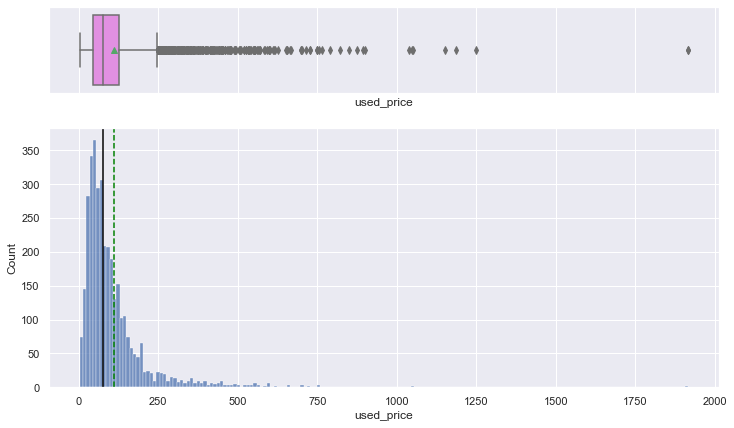

In [11]:
histogram_boxplot(phone_data, "used_price")

**Observation**
* Used price is skewed to the right, which means some prices of used phone are high.
* Mean used price is around 110.

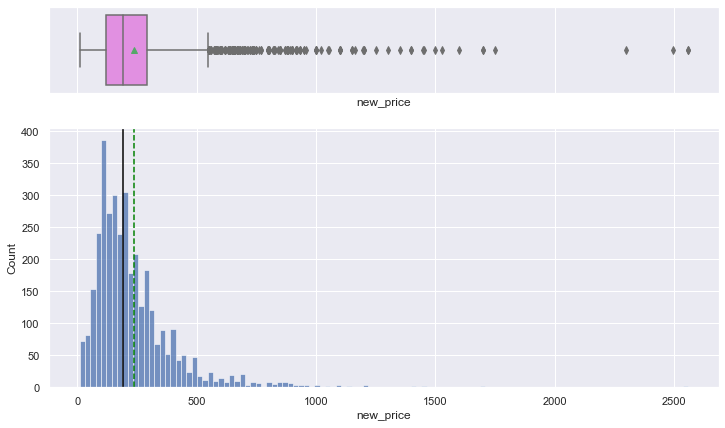

In [12]:
histogram_boxplot(phone_data, "new_price")

**Observation**

- New price is skewed to the right, which mean some prices of phone when new are high.
- Mean new price is around 237.

# 2. Percentage of the used phone market is dominated by Android devices

In [13]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

In [14]:
phone_data1.groupby("os")["used_price"].count()

os
Android    3246
Others      202
Windows      67
iOS          56
Name: used_price, dtype: int64

In [15]:
# let us compute the percentage
dom_perc = phone_data1.groupby("os")["used_price"].count()/phone_data1["used_price"].count()
dom_perc

os
Android   0.909
Others    0.057
Windows   0.019
iOS       0.016
Name: used_price, dtype: float64

### The percentage of used phones dominating the market which are Android devices is 91%

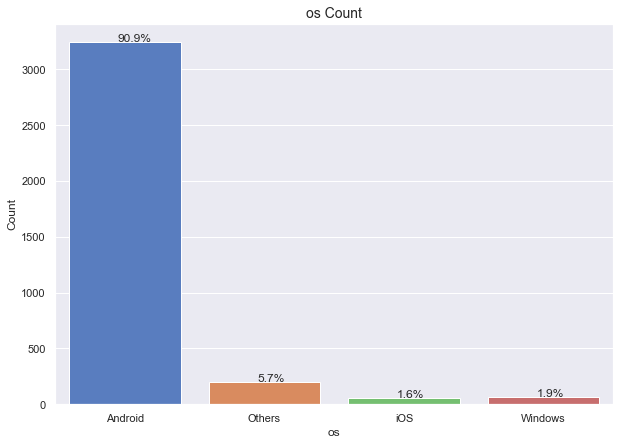

In [16]:
plt.figure(figsize=(10,7))
sns.set_palette("muted")
ax = sns.countplot(phone_data1['os'])
plt.xlabel('os')
plt.ylabel('Count')
bar_perc(ax,phone_data1['os'])
ax.set_title("os Count", fontsize=14);

# 3. How does the amount of RAM vary with the brand

In [17]:
phone_data1.groupby("brand_name")["ram"].mean()

brand_name
Acer         3.902
Alcatel      3.426
Apple        4.000
Asus         4.048
BlackBerry   3.830
Celkon       1.466
Coolpad      3.955
Gionee       3.933
Google       4.533
HTC          4.000
Honor        4.593
Huawei       4.641
Infinix      2.600
Karbonn      3.375
LG           3.894
Lava         3.278
Lenovo       3.887
Meizu        4.452
Micromax     3.750
Microsoft    4.000
Motorola     3.945
Nokia        3.601
OnePlus      6.364
Oppo         4.961
Others       3.751
Panasonic    4.000
Realme       4.195
Samsung      4.159
Sony         4.068
Spice        3.750
Vivo         4.756
XOLO         4.000
Xiaomi       4.567
ZTE          4.023
Name: ram, dtype: float64

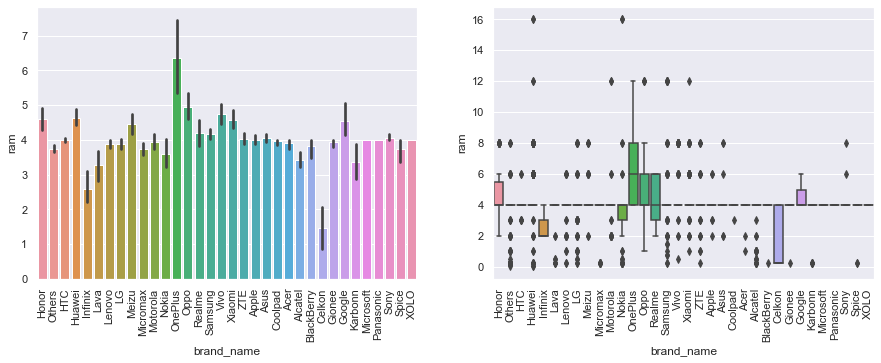

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=phone_data, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=phone_data, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

**Observation**

- OnePlus has the highest ram followed by Oppo and then Vivo.
- The brands with the least ram are Celkon and Infinix.

# 4. Which attributes are highly correlated with the used phone price?

In [19]:
phone_data1.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000,0.189,0.370,0.144,0.283,0.742,0.635,0.455,-0.397,0.342,0.386
main_camera_mp,0.189,1.000,0.424,0.004,0.207,0.240,-0.073,0.354,-0.143,0.360,0.281
selfie_camera_mp,0.370,0.424,1.000,0.283,0.445,0.345,-0.005,0.697,-0.556,0.399,0.498
int_memory,0.144,0.004,0.283,1.000,0.080,0.113,0.018,0.219,-0.229,0.343,0.405
ram,0.283,0.207,0.445,0.080,1.000,0.234,0.070,0.311,-0.287,0.443,0.523
battery,0.742,0.240,0.345,0.113,0.234,1.000,0.704,0.457,-0.351,0.342,0.364
weight,0.635,-0.073,-0.005,0.018,0.070,0.704,1.000,0.062,-0.059,0.198,0.171
release_year,0.455,0.354,0.697,0.219,0.311,0.457,0.062,1.000,-0.749,0.297,0.457
days_used,-0.397,-0.143,-0.556,-0.229,-0.287,-0.351,-0.059,-0.749,1.000,-0.236,-0.471
new_price,0.342,0.360,0.399,0.343,0.443,0.342,0.198,0.297,-0.236,1.000,0.926


In [20]:
phone_data1[phone_data1.columns[:]].corr()["used_price"][:]

screen_size         0.386
main_camera_mp      0.281
selfie_camera_mp    0.498
int_memory          0.405
ram                 0.523
battery             0.364
weight              0.171
release_year        0.457
days_used          -0.471
new_price           0.926
used_price          1.000
Name: used_price, dtype: float64

- There is a high correlation between new_price and old_price. This mean an increase in the price of new phone will give an increase in the price when it is sold as used.
- The mp size of a selfie camera and size of ram has a postive impact in the used_price.
- The weight is negatively correlated to the used price. i.e. the weight of a phone does not determine the price.

<AxesSubplot:>

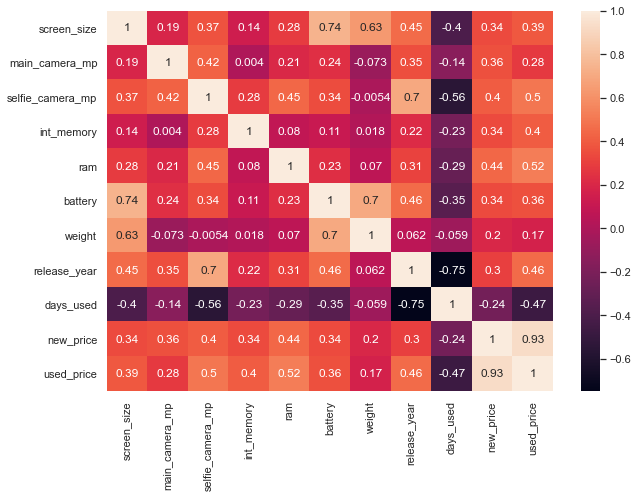

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(phone_data1.corr(), annot=True)

**Observation**

* used price is highly positively correlated with new price which means as the price of new phones increased so will the price of same phone used also increases.
* used price is highly negatively correlated with days used, which means as the number of days used increases the used price decreases.

<AxesSubplot:xlabel='used_price', ylabel='days_used'>

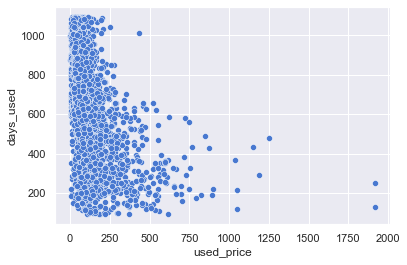

In [22]:
# Relationship between days_used and used_price
sns.scatterplot(phone_data1['used_price'], phone_data1['days_used'])

- The more days a phone is used the cheaper it will be. 

**Relationship between release_year and used_price**

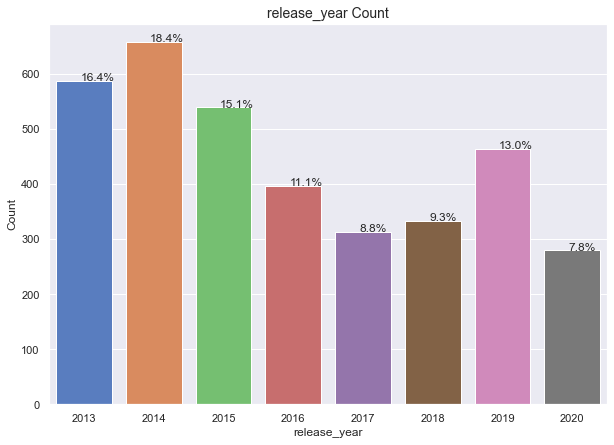

In [23]:
# Plotting release_year count

plt.figure(figsize=(10,7))
sns.set_palette("muted")
ax = sns.countplot(phone_data['release_year'])
plt.xlabel('release_year')
plt.ylabel('Count')
bar_perc(ax,phone_data['release_year'])
ax.set_title("release_year Count", fontsize=14);

- 18.4% of phones in the data were released in 2014.

<AxesSubplot:xlabel='used_price', ylabel='release_year'>

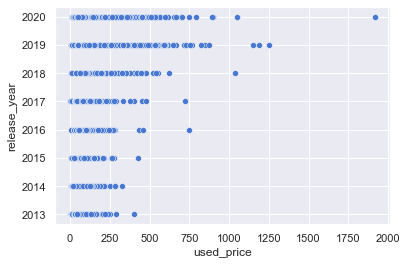

In [24]:
sns.scatterplot(phone_data1['used_price'], phone_data1['release_year'])

- The phone with the highest used_price was release in 2020. 
- This is understandable as most recent phones are always expensive.

### Data Preprocessing 

**Missing Data Treatment**

In [25]:
# Impute categorical data using median

medianFiller = lambda x: x.fillna(x.median())
numeric_columns = phone_data.select_dtypes(include=np.number).columns.tolist()
phone_data[numeric_columns] = phone_data[numeric_columns].apply(medianFiller, axis=0)

In [26]:
# checking the number of missing values
phone_data.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

**No more missing values**

### Outlier detection and treatment

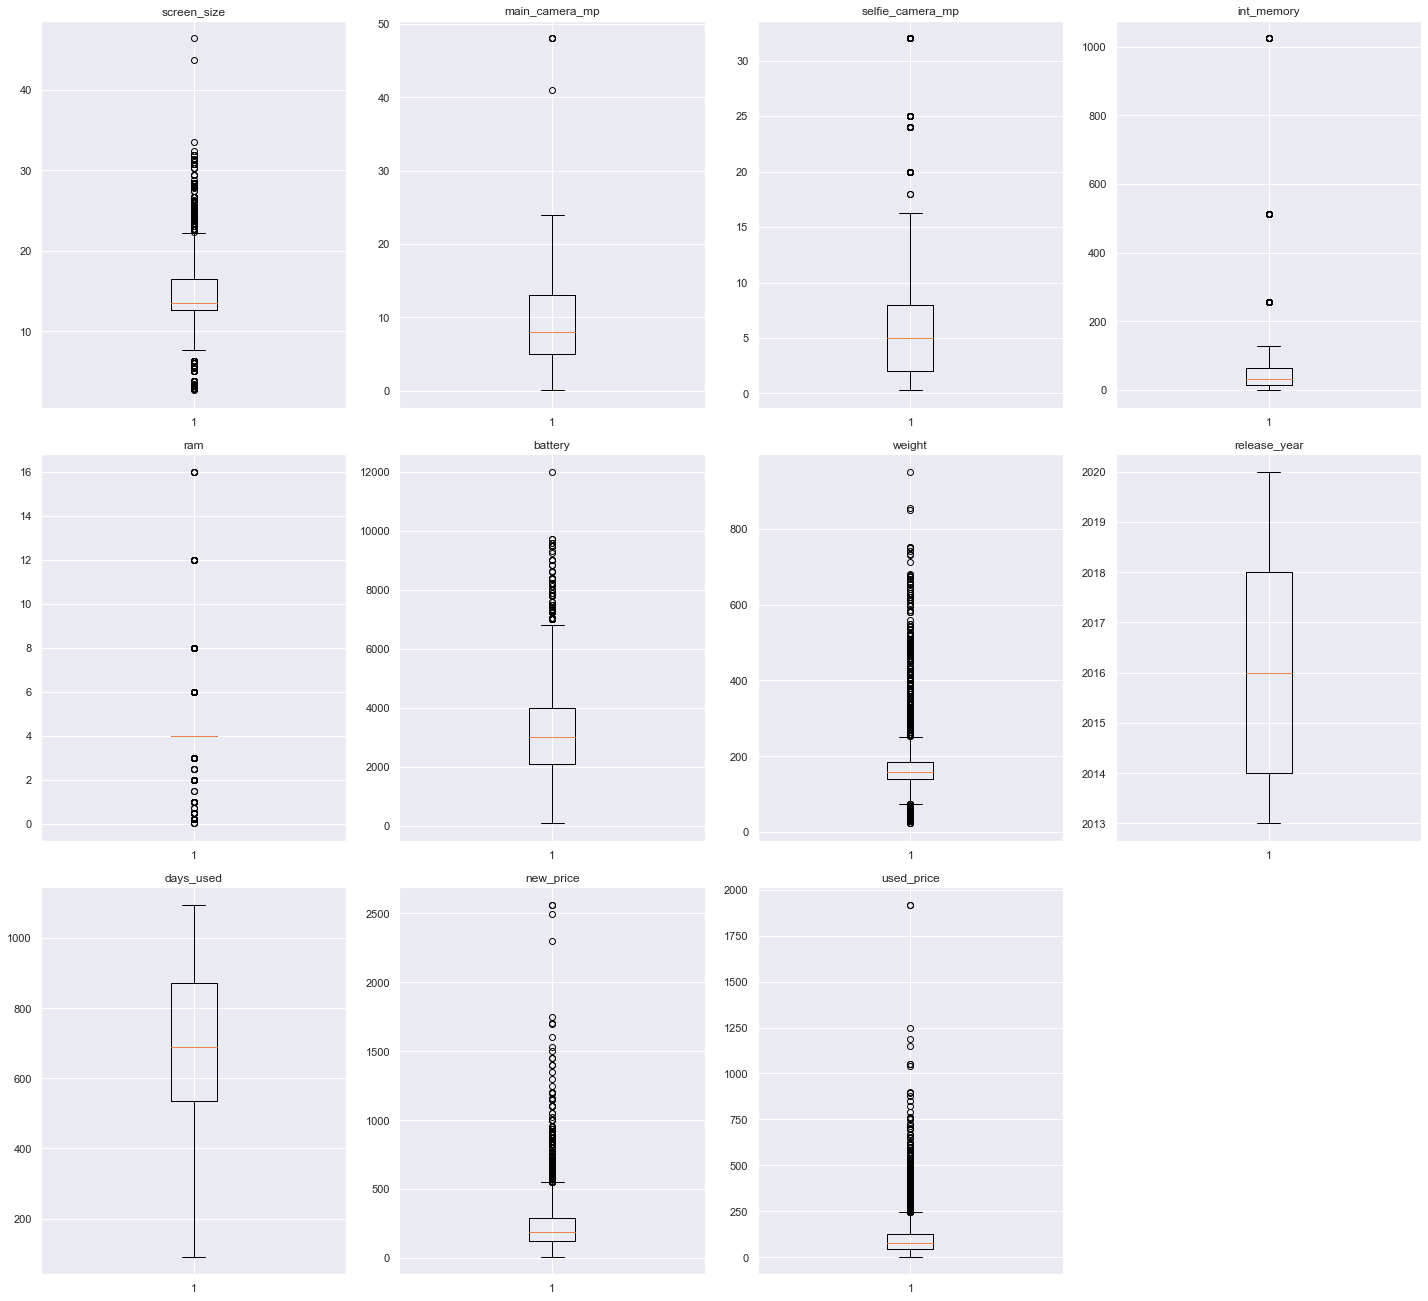

In [27]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(phone_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

* All columns have outliers except release year and days used 
* Weight and screen size have both upper and lower outliers


### Outlier Treatment

- Let's treat outliers in the data by flooring and capping.

In [28]:
def treat_outliers(phone_data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    phone_data: dataframe
    col: name of the column
    """
    Q1 = phone_data[col].quantile(0.25)  # 25th quantile
    Q3 = phone_data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    phone_data[col] = np.clip(phone_data[col], Lower_Whisker, Upper_Whisker)

    return phone_data


def treat_outliers_all(phone_data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    phone_data: data frame
    """
    for c in col_list:
        phone_data = treat_outliers(phone_data, c)

    return phone_data

In [29]:
# treating the outliers
numerical_col = phone_data.select_dtypes(include=np.number).columns.tolist()
phone_data = treat_outliers_all(phone_data, numerical_col)

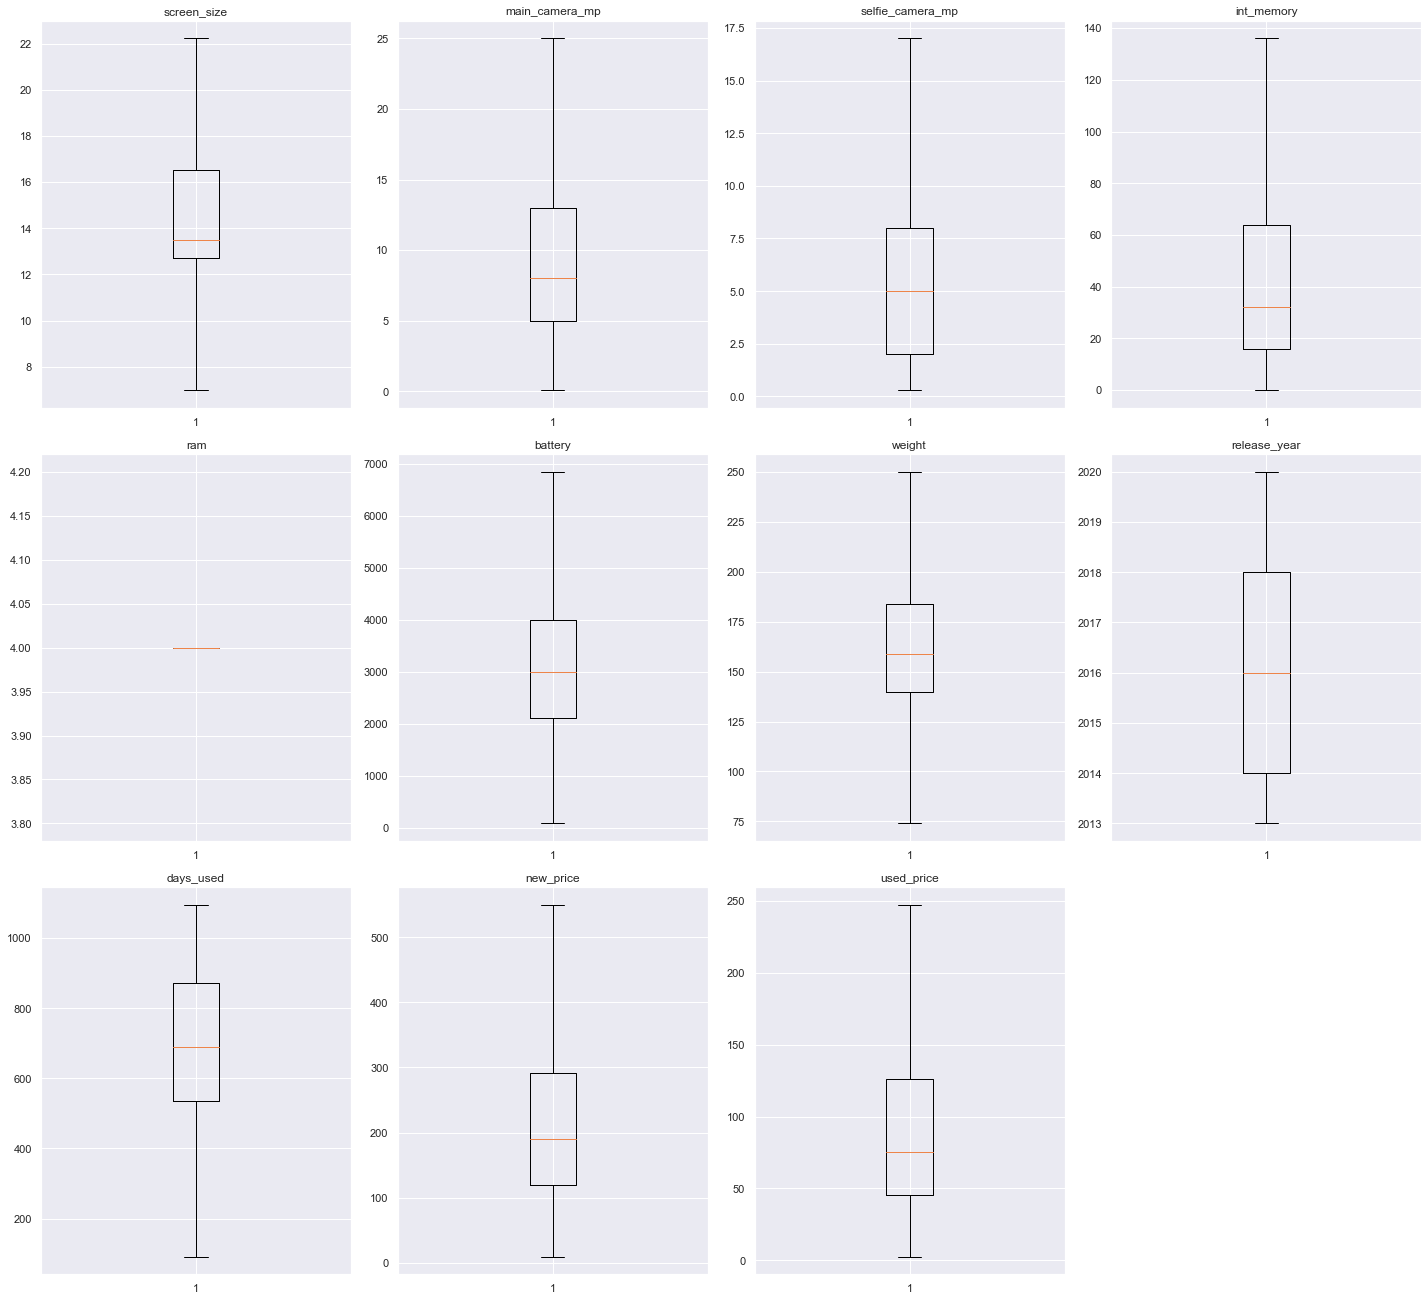

In [30]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(phone_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**All outliers have been treatment.**

## Linear Model Building

1. We want to predict the price of used phones.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [31]:
# defining X and y variables
X = phone_data.drop(["used_price"], axis=1)
y = phone_data["used_price"]

print(X.shape)
print(y.shape)

print(X.head())
print(y.head())

(3571, 14)
(3571,)
  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       22.225  yes   no          13.000   
1      Honor  Android       22.225  yes  yes          13.000   
2      Honor  Android       22.225  yes  yes          13.000   
3      Honor  Android       22.225  yes  yes          13.000   
4      Honor  Android       15.720  yes   no          13.000   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0             5.000      64.000 4.000 3020.000 146.000          2020   
1            16.000     128.000 4.000 4300.000 213.000          2020   
2             8.000     128.000 4.000 4200.000 213.000          2020   
3             8.000      64.000 4.000 6850.000 250.000          2020   
4             8.000      64.000 4.000 5000.000 185.000          2020   

   days_used  new_price  
0        127    111.620  
1        325    249.390  
2        162    359.470  
3        345    278.930  
4        293    140.870  
0    86

In [32]:
# converting categorical variables to numerical
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)


X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,22.225,13.000,5.000,64.000,4.000,3020.000,146.000,2020,127,111.620,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,22.225,13.000,16.000,128.000,4.000,4300.000,213.000,2020,325,249.390,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,22.225,13.000,8.000,128.000,4.000,4200.000,213.000,2020,162,359.470,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,22.225,13.000,8.000,64.000,4.000,6850.000,250.000,2020,345,278.930,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.720,13.000,8.000,64.000,4.000,5000.000,185.000,2020,293,140.870,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
print(X.shape)

(3571, 48)


In [34]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [35]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


In [36]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

**Let's check the coefficients and intercept of the model.**

In [37]:
coef_phone_data = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_phone_data

,Coefficients
screen_size,0.404
main_camera_mp,-0.439
selfie_camera_mp,0.837
int_memory,0.106
ram,-0.000
battery,-0.000
weight,-0.016
release_year,-0.293
days_used,-0.084
new_price,0.380


**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [38]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    phone_data_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return phone_data_perf

In [39]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.685,10.127,0.957,0.956,17.780


In [40]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.541,10.520,0.952,0.949,18.456


**Observations**

- The training $R^2$ is 95.7%, indicating that the model explains 95.7% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict life expectancy within a mean error of 2.7 years on the test data.

- MAPE on the test set suggests we can predict within 18% of the used_price.

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [41]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train, has_constant='add')
# adding constant to the test data
x_test1 = sm.add_constant(x_test, has_constant='add')

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:54:49   Log-Likelihood:                -10084.
No. Observations:                2499   AIC:                         2.026e+04
Df Residuals:                    2451   BIC:                         2.054e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.27

**Observations**

* Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
* But these variables might contain multicollinearity, which will affect the p-values.
* So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [43]:
checking_vif(x_train1)

,feature,VIF
0,const,0.000
1,screen_size,3.686
2,main_camera_mp,2.197
3,selfie_camera_mp,3.806
4,int_memory,2.294
5,ram,0.000
6,battery,3.629
7,weight,3.129
8,release_year,5.071
9,days_used,2.634


**Observations**

* *brand_name_Samsung*, *brand_name_Others*, *brand_name_LG*, *brand_name_Huawei* and *release_year* have VIF slightly greater than 5
* *os_iOS* and *brand_name_Apple* have a VIF score of much greater than 5.
* Due to the above columns were gotten from the onehot encoding, they are correlated with each other. Hence, they will not be dropped.
* When they were converted to numerical values, it was just 0s and 1s which will correlated. This explains why they are greater than 5 either sightly or more.

Let's check the model performance.

In [44]:
olsmod1 = sm.OLS(y_train, x_train).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:55:03   Log-Likelihood:                -10084.
No. Observations:                2499   AIC:                         2.026e+04
Df Residuals:                    2451   BIC:                         2.054e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.40

**Observations**

* Adj. R-squared is still the same as 0.95, which shows that not dropping the columns did not have any effect on the model.
* Let's look at the p-values of predictor variables to check their significance:
*ram*, battery*, *weight*, *release_year*, all brand names **except** *brand_name_OnePlus*, *brand_name_Infinix*, *brand_name_Google* and all os have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient. 




In [45]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'days_used', 'new_price', 'brand_name_BlackBerry', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_Infinix', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_OnePlus', 'os_Others', 'os_iOS', '4g_yes']


In [46]:
x_train4 = x_train[selected_features]
x_test4 = x_test[selected_features]

In [47]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3416.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:55:09   Log-Likelihood:                -10102.
No. Observations:                2499   AIC:                         2.024e+04
Df Residuals:                    2482   BIC:                         2.034e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.21

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train* as the final ones and *olsmod2* as final model.**

**Observations**

* Adjusted R-squared is 0.956, i.e., our model is able to explain 95% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.957. This shows that not dropping the variables (affected by the one hot encoding), the model is not affected.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [48]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1248,98.870,108.415,-9.545
2206,132.620,145.034,-12.414
1623,25.270,36.190,-10.920
2245,104.260,109.301,-5.041
1043,39.220,51.816,-12.596


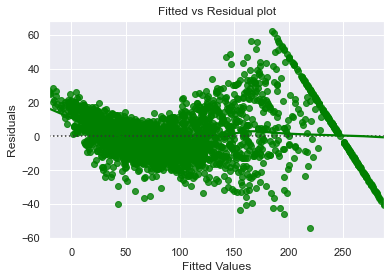

In [49]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="green", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

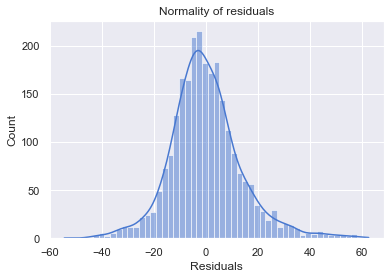

In [50]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

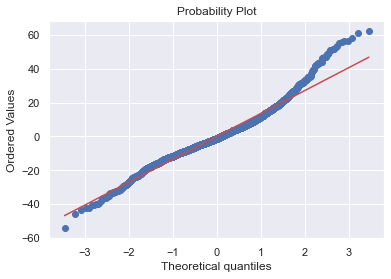

In [51]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals are some what following a straight line except for the top tails and slightly and the bottom tail.
- Let's check the results of the Shapiro-Wilk test.

In [52]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9679282903671265, pvalue=3.469884524338229e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [53]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.9600538562816499), ('p-value', 0.7628203099718505)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [54]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
255,194.450,171.704
1398,170.240,149.840
2253,164.760,207.442
579,39.090,43.450
3123,45.080,38.140
1959,51.050,57.561
3111,40.070,34.602
1456,54.750,52.028
3332,95.060,104.454
855,44.030,47.814


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

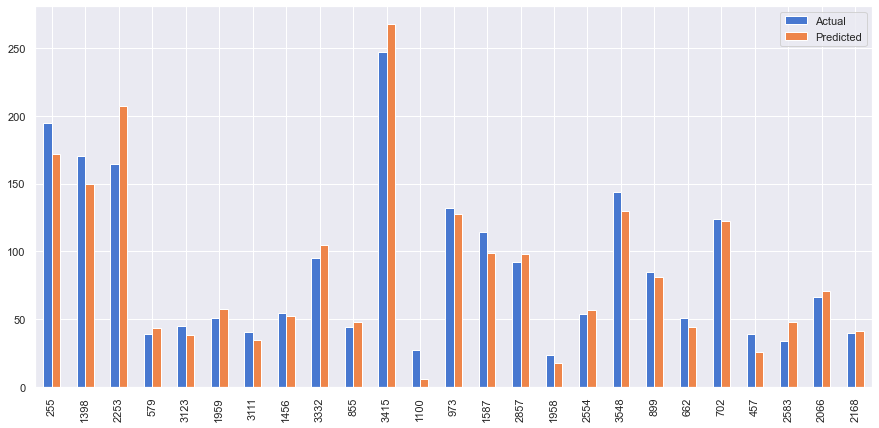

In [55]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [56]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.783,10.181,0.957,0.956,17.923


In [57]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.303,10.351,0.953,0.952,17.958


* The model is able to explain ~95% of the variation in the data, which is very good.

* The train and test RMSE and MAE are quite high. 

* The MAPE on the test set suggests we can predict within 17.9% of the life expectancy. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [58]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.685,13.783
MAE,10.127,10.181
R-squared,0.957,0.957
Adj. R-squared,0.956,0.956
MAPE,17.780,17.923


In [59]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,14.541,14.303
MAE,10.520,10.351
R-squared,0.952,0.953
Adj. R-squared,0.949,0.952
MAPE,18.456,17.958


* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [60]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3416.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:55:50   Log-Likelihood:                -10102.
No. Observations:                2499   AIC:                         2.024e+04
Df Residuals:                    2482   BIC:                         2.034e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.21

## Conclusions

1. *days_used* are quite significant. As it increases, the used_price decreases, as is visible in the negative coefficient sign.
2. The price of a new phone will determine the price when it is sold as used. This means the higher the price of a new phone, the higher the priced when sold as used.
3. There is an increase in the price of some used phones based on brands. brand_name_Google and brand_name_Apple are high due to the positive coefficient sign.
4. The higher the ram, int_memory and selfie_camera_mp in a used phone, the higher the price of the phone (used).
5. There is a low price in brands such as OnePlus and Infinix. They cost about 16 and ~15 euros respectively.